In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# erste Punktwolke
x_werte = np.random.normal(3,0.2,100)
y_werte = np.random.normal(3,0.2,100)

# zweite Punktwolke
x_werte_2 = np.random.normal(6,1,1000)
y_werte_2 = np.random.normal(6,1,1000)

# dritte Punktwolke
x_werte_3 = np.random.normal(5,0.2,1000)
y_werte_3 = np.random.normal(5,0.2,1000)

# Clusters with different densities

In [5]:
data_x = np.concatenate([x_werte, x_werte_2, x_werte_3])
data_y = np.concatenate([y_werte, y_werte_2, y_werte_3])

dataset = pd.DataFrame()

dataset['x'] = data_x
dataset['y'] = data_y

dataset.head()

x = np.array([1,1,1])

kmeans = KMeans(n_clusters=3, random_state=0, n_init=100).fit(dataset)
dataset['cluster_nr'] = kmeans.predict(dataset)

# plotte ich diesen Datensatz mit 'scatter'
plt.figure(1, figsize=(6, 6))
plt.scatter(data_x, data_y, c=dataset['cluster_nr'])
plt.show();

NameError: name 'KMeans' is not defined

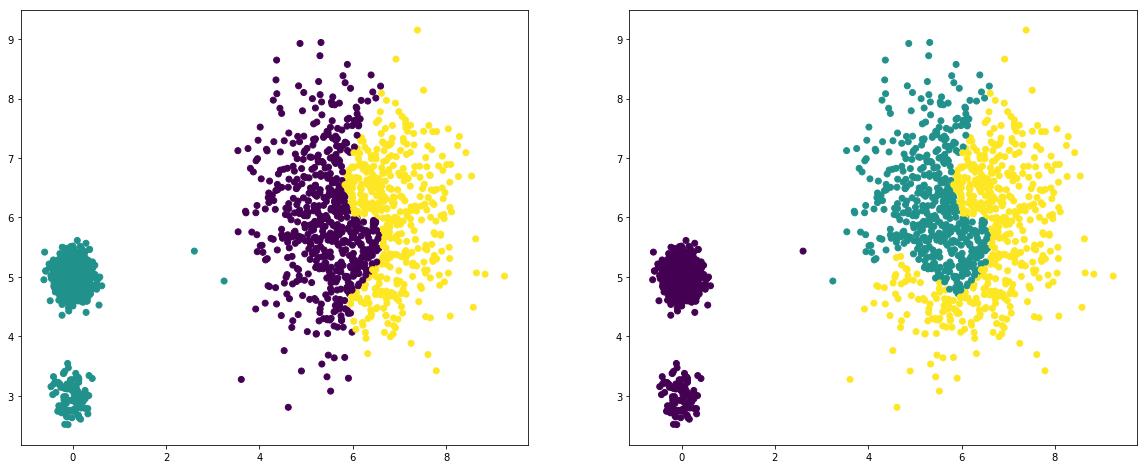

In [149]:
#Anpassung der Versuche
K = KMeans(n_clusters=3,n_init=1).fit(dataset)
dataset["clusternumber"]=K.predict(dataset)
K2 = KMeans(n_clusters=3,n_init=10).fit(dataset)
dataset["clusternumber2"]=K2.predict(dataset)

plt.figure (1,figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter (data_x,data_y,c=K.labels_)

plt.subplot(1,2,2)
plt.scatter (data_x,data_y,c=K2.labels_)

# Numbers of clusters

In [78]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=6,
                       cluster_std=0.5, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

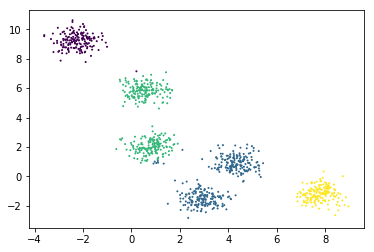

In [91]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=1, cmap='viridis');

In [68]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

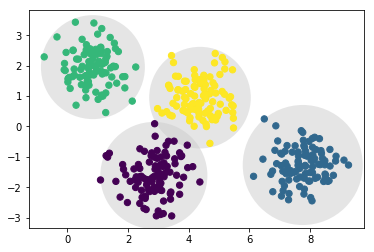

In [9]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)


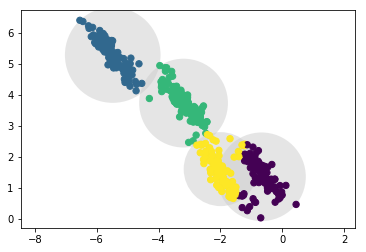

In [10]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

# Non-convex/non-round-shaped clusters: Standard K-means fails!

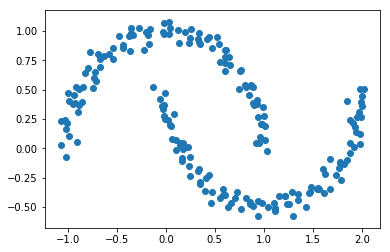

In [11]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

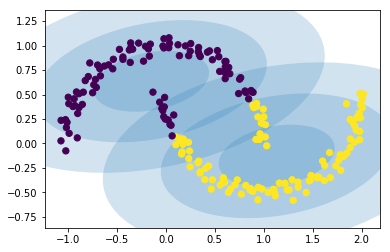

In [24]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

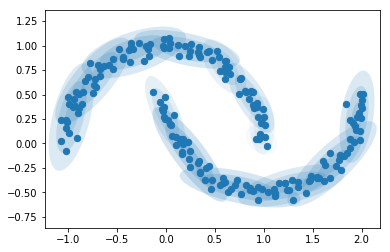

In [25]:
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

In [17]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

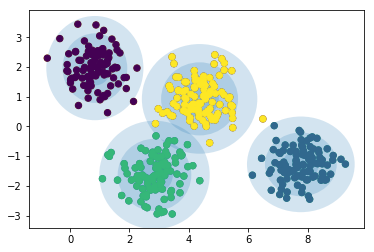

In [18]:
from sklearn.mixture import GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

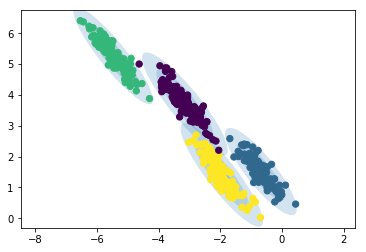

In [23]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

In [128]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=5,
                       cluster_std=0.2, random_state=0)
X1, y1_true = make_blobs(n_samples=1000, centers=1, cluster_std=3, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

In [ ]:
x_wert = np.random.normal(0,1,1000) * np.random.binomial(1000,0.5)
x_wert_2 = np.random.normal(0,1,1000)
y_wert = np.random.normal(5,1,1000) * np.random.gamma(3, size = 1000) * np.random.normal(2,0.5,1000)
y_wert_2 = np.random.normal(0,1,1000)
data_x = np.concatenate([x_wert, x_wert_2])
data_y = np.concatenate([y_wert, y_wert_2])

plt.scatter(data_x, data_y)
plt.scatter(x_wert,y_wert)
plt.show()

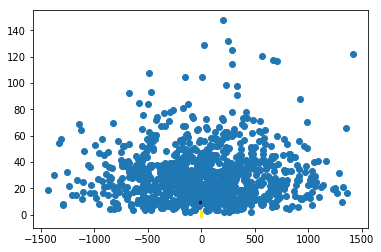

In [138]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(2, random_state=0)
labels = kmeans.fit(X).predict(X)
kmeans1 = KMeans(1, random_state=0)
labels1 = kmeans.fit(X1).predict(X1)
plt.scatter(x_wert,y_wert)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=1, cmap='viridis');